# Simulação Monte Carlo
## Geração de números Aleatórios: Linear Congruential Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random(Xi, a, c, m):
  Xii = (a * Xi + c) % m

  return Xii

In [13]:
a = 11
c = 0
m = 16
X0 = 1
n = 20 # números a serem gerados

Xi = X0
X = [X0]

for i in range(0, n):
  Xi = random(Xi, a, c, m)
  X.append(Xi)
print(X)

s = np.arange(0, len(X))

[1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1]


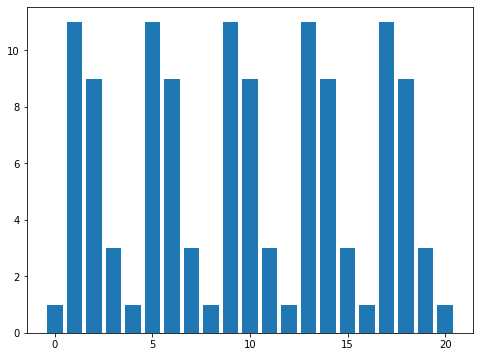

In [18]:
plt.figure(figsize=(8,6))
plt.bar(s, X)
plt.show()

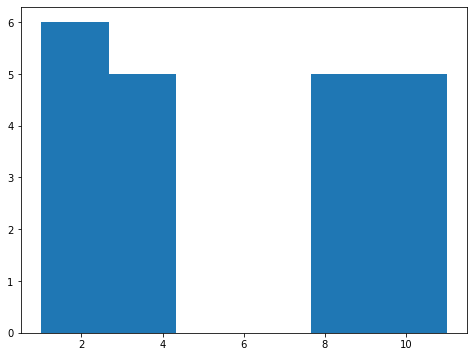

In [20]:
plt.figure(figsize=(8,6))
plt.hist(X, bins='auto', histtype='bar')
plt.show()

In [35]:
# Perturbação numérica
a = 7**5
c = 0
m = 2**31-1
X0 = 0.5
n = 50000
Xi = X0
X = [X0]
for i in range(n):
  Xi = random(Xi, a, c, m)
  X.append(Xi/m)
print(X)

s = np.arange(0, len(X))

[0.5, 3.9131846297128054e-06, 0.06576889407158312, 0.3778026610975166, 0.7293250659617246, 0.7663836187060846, 0.6094795931640452, 0.5235223081072431, 0.8394323584341594, 0.3396482029183061, 0.4673464479704138, 0.6917510387449297, 0.2597081860339773, 0.9154826730561828, 0.5172860552637307, 0.026730817522262605, 0.2648500966675813, 0.33557469203862117, 0.003849093105573716, 0.6917078253774475, 0.5334211187592806, 0.20874298722890344, 0.34338635618024804, 0.2944883214284146, 0.46521824736391115, 0.9230834452542865, 0.2634643887930849, 0.04598244537877964, 0.8269594811494273, 0.7079996784254907, 0.3505952972223029, 0.4551604152448291, 0.8810990198427341, 0.6312264968320851, 0.023732256853828328, 0.8680409422926796, 0.16411711306502907, 0.31631928394377196, 0.37820524297571056, 0.4955186927670234, 0.18266933536281313, 0.12351944280020867, 0.9912751431070618, 0.36133020038778435, 0.8766779174919603, 0.325759287376776, 0.03634294147432919, 0.8158173590506508, 0.4423535642877005, 0.6363549833

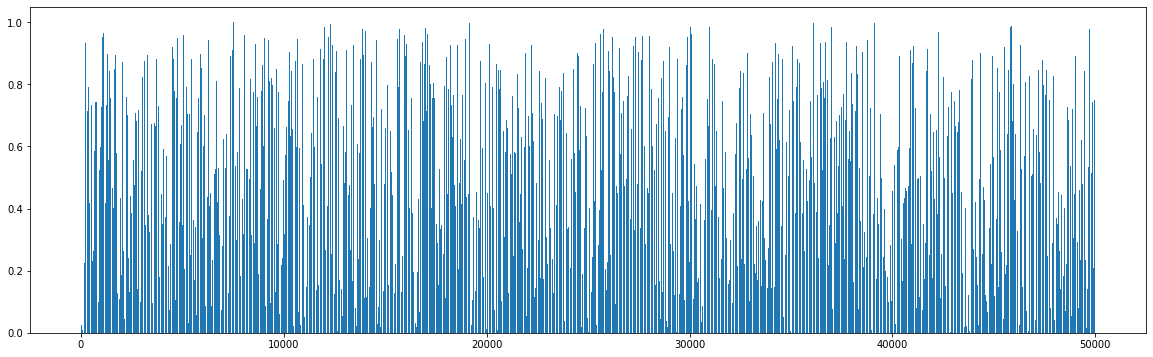

In [36]:
plt.figure(figsize=(20,6))
plt.bar(s, X)
plt.show()

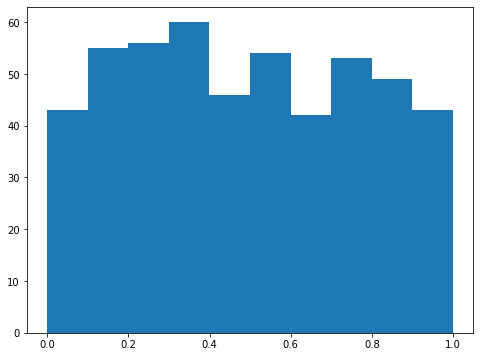

In [32]:
plt.figure(figsize=(8,6))
plt.hist(X, bins='auto', histtype='bar')
plt.show()

In [37]:
# Vamos simular
# Simular a retirada de bolas de urna
# Bolas: B-> brancas (6) e P->pretas (4)

In [39]:
urna = ['B', 'B', 'B', 'B', 'B', 'B', 'P', 'P', 'P', 'P']
urna

['B', 'B', 'B', 'B', 'B', 'B', 'P', 'P', 'P', 'P']

In [41]:
# Vamos retirar 100 bolas e verificar quantas vezes foram brancas
import random

n = 0
n_experimentos = 100
for i in range(0, n_experimentos):
  posicao = random.randint(0, len(urna)-1)
  if (urna[posicao] == 'B'):
    n = n + 1
print('Fração de vezes que saiu uma bola branca:', n/n_experimentos)

Fração de vezes que saiu uma bola branca: 0.64


In [42]:
valor_teorico = 0
for bola in urna:
  if(bola == 'B'):
    valor_teorico += 1
valor_teorico = valor_teorico/len(urna)
print('Valor de brancas:', valor_teorico)

Valor de brancas: 0.6


In [46]:
urna.count('B')/len(urna)

0.6

In [56]:
vp = [] # fração de ocorrências em função do número de simulações
vsim = [] # armazena as simulações
n_max = 100

for n_sim in np.arange(1, n_max, 1):
  n = 0 # número de retiradas de bolas brancas
  for i in range(1, n_sim):
    posicao = random.randint(0, len(urna)-1)
    if(urna[posicao] == 'B'):
      n += 1
  vp.append(n/n_sim)
  vsim.append(n_sim)


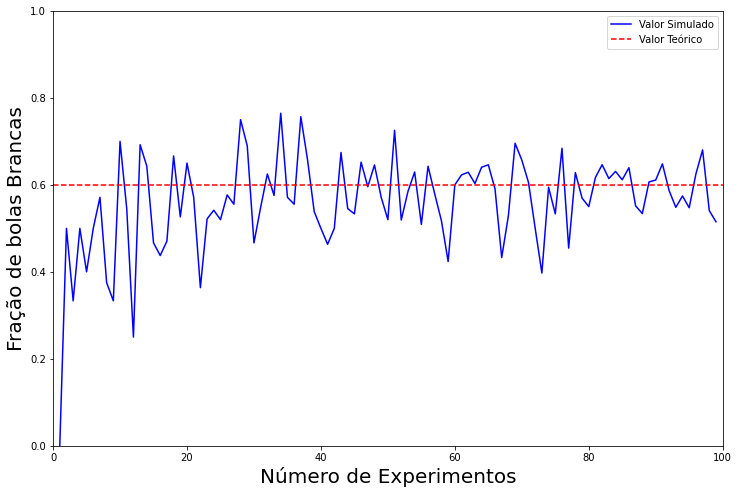

In [57]:
plt.figure(figsize=(12,8))
plt.plot(vsim, vp, linestyle='-', color='blue', label='Valor Simulado')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label='Valor Teórico')
plt.xlabel('Número de Experimentos', fontsize=20)
plt.ylabel('Fração de bolas Brancas', fontsize=20)
plt.xlim([0.0, n_max])
plt.ylim([0.0, 1])
plt.legend()
plt.show()

# Exercício

1. Considere uma urna com 20 bolas, sendo 14 brancas e 6 pretas. Verificar se a estimação é correta, com base na simulação anterior.

2. Vamos simular o lançamento de uma moeda. Para isso, precisamos definir uma regra para escolher se saiu cara ou coroa. Para entendermos melhor como definir essa regra, notem que no exemplo anterior, ordenamos as bolas em um vetor. Essa ordenação não faz a menor diferença no exemplo anterior, pois a não consideramos. Se consideramos a ordenação, a regra poderia ser: se a posição no vetor é menor ou igual a 6, então a bola é branca. Caso contrário, é preta. Ou seja, podemos usar essa regra para definir qual dos valores vamos selecionar.